In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.08.31']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
919,Afghanistan,22.08.31,193250
1850,Africa,22.08.31,12326188
2769,Albania,22.08.31,329352
3688,Algeria,22.08.31,270304
4601,Andorra,22.08.31,46027
...,...,...,...
209475,Wallis and Futuna,22.08.31,761
210429,World,22.08.31,602964103
211303,Yemen,22.08.31,11926
212200,Zambia,22.08.31,332822


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
919,Afghanistan,22.08.31,193250
2769,Albania,22.08.31,329352
3688,Algeria,22.08.31,270304
4601,Andorra,22.08.31,46027
5496,Angola,22.08.31,102636
...,...,...,...
208793,Vietnam,22.08.31,11411679
209475,Wallis and Futuna,22.08.31,761
211303,Yemen,22.08.31,11926
212200,Zambia,22.08.31,332822


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
201798,United States,22.08.31,94532122
88585,India,22.08.31,44436339
68030,France,22.08.31,34591380
27412,Brazil,22.08.31,34429853
72597,Germany,22.08.31,32184553
200845,United Kingdom,22.08.31,23521792
178995,South Korea,22.08.31,23327897
95958,Italy,22.08.31,21867757
159164,Russia,22.08.31,19244647
97815,Japan,22.08.31,18949793


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
195438,Turkey,22.08.31,16671848
180817,Spain,22.08.31,13342530
145594,Oceania,22.08.31,12151323
208793,Vietnam,22.08.31,11411679
12004,Australia,22.08.31,10042081
...,...,...,...
209475,Wallis and Futuna,22.08.31,761
90435,International,22.08.31,721
206940,Vatican,22.08.31,29
160789,Saint Helena,22.08.31,7


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.08.31', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_16912\1598604561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.08.31', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.08.31,94532122
India,22.08.31,44436339
France,22.08.31,34591380
Brazil,22.08.31,34429853
Germany,22.08.31,32184553
United Kingdom,22.08.31,23521792
South Korea,22.08.31,23327897
Italy,22.08.31,21867757
Russia,22.08.31,19244647


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.08.31,94532122
1,India,22.08.31,44436339
2,France,22.08.31,34591380
3,Brazil,22.08.31,34429853
4,Germany,22.08.31,32184553
5,United Kingdom,22.08.31,23521792
6,South Korea,22.08.31,23327897
7,Italy,22.08.31,21867757
8,Russia,22.08.31,19244647
9,Japan,22.08.31,18949793


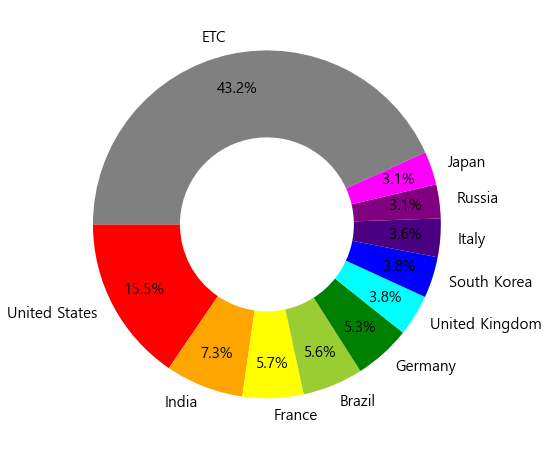

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()